In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("clean_data.csv")

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df['price']

0        36.00€
1        67.80€
2        24.00€
3       126.50€
4        41.80€
         ...   
2460    113.00€
2461     42.90€
2462     25.90€
2463     53.11€
2464     62.10€
Name: price, Length: 2465, dtype: object

In [5]:
df['price'] = df.price.str.strip('€')

In [6]:
df['price']= df.price.str.replace('1.898.40', '1898.40')

C:\Users\marta\AppData\Local\Temp/ipykernel_10552/3615045361.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price']= df.price.str.replace('1.898.40', '1898.40')


In [7]:
df['price']=df['price'].astype('float')

In [8]:
X = df.drop(['names'],axis=1)
y =df['names']

In [9]:
categoricals_X = X.select_dtypes(object)
numericals_X = X.select_dtypes(np.number)

In [10]:
categoricals_X.head()

,brand
0,paula's choice
1,sunday riley
2,dieux skin
3,revitalash
4,then i met you


In [11]:
numericals_X.head()

,price,stars,moisturiser,toner,mask,cleanser,exfoliator,oil,serums,hyperpigmantation,...,vegan,oily_skin,dry_skin,day_cream,night,wrinkles,acne,spf,eye_cream,cruelty_free
0,36.0,4.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,67.8,3.33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,24.0,4.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,126.5,4.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41.8,4.44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here only price and stars are actually numerical because the rest are just cetgoriv¡cal values that are already encoded. So I will only standardize those two columns.

In [12]:
numericals = numericals_X[['price', 'stars']]

In [13]:
numericals_X = numericals_X.drop(columns=['price', 'stars'])

In [14]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler()
transformer.fit(numericals)
numericals_standardized = transformer.transform(numericals)


In [15]:
import pickle
filename = "StandardSacler.pickle" # Path with filename
with open(filename, "wb") as file:
    pickle.dump(StandardScaler,file)

In [16]:
numericals_standardized = pd.DataFrame(numericals_standardized, columns = numericals.columns )

In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categoricals_X)


filename = "OneHotEncoder.pickle" # Path with filename
with open(filename, "wb") as file:
    pickle.dump(OneHotEncoder,file)

categoricals_X_encoded = encoder.transform(categoricals_X).toarray()

categoricals_X_encoded = pd.DataFrame(categoricals_X_encoded, columns = encoder.get_feature_names_out()) #adds column names, they werenot present above
display(categoricals_X_encoded.head())

,brand_111skin,brand_aesop,brand_algenist,brand_allies of skin,brand_alpha-h,brand_ameliorate,brand_anastasia beverly hills,brand_angela caglia,brand_anthony,brand_apothem labs,...,brand_wander beauty,brand_weleda,brand_westman atelier,brand_white lotus,brand_wishful,brand_youth to the people,brand_yu ling rollers,brand_zelens,brand_ziip beauty,brand_zitsticka
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_transformed= pd.concat([categoricals_X_encoded,numericals_standardized, numericals_X], axis=1)

In [19]:
X_transformed

,brand_111skin,brand_aesop,brand_algenist,brand_allies of skin,brand_alpha-h,brand_ameliorate,brand_anastasia beverly hills,brand_angela caglia,brand_anthony,brand_apothem labs,...,vegan,oily_skin,dry_skin,day_cream,night,wrinkles,acne,spf,eye_cream,cruelty_free
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2461,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_transformed.columns

Index(['brand_111skin', 'brand_aesop', 'brand_algenist',
       'brand_allies of skin', 'brand_alpha-h', 'brand_ameliorate',
       'brand_anastasia beverly hills', 'brand_angela caglia', 'brand_anthony',
       'brand_apothem labs',
       ...
       'vegan', 'oily_skin', 'dry_skin', 'day_cream', 'night', 'wrinkles',
       'acne', 'spf', 'eye_cream', 'cruelty_free'],
      dtype='object', length=212)

In [21]:
X_transformed['price']

0      -0.287883
1       0.155909
2      -0.455351
3       0.975109
4      -0.206939
          ...   
2460    0.786707
2461   -0.191588
2462   -0.428835
2463   -0.049100
2464    0.076361
Name: price, Length: 2465, dtype: float64

In [22]:
df1 = X_transformed

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

In [24]:
kmeans = KMeans(n_clusters=15, random_state=1234)
kmeans.fit(df1)

KMeans(n_clusters=15, random_state=1234)

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 15703.351247623064.
Iteration 1, inertia 10498.047616398733.
Iteration 2, inertia 10399.552480026441.
Iteration 3, inertia 10374.020491813304.
Iteration 4, inertia 10357.480570504034.
Iteration 5, inertia 10345.219210587189.
Iteration 6, inertia 10337.703366826192.
Iteration 7, inertia 10333.33430965578.
Iteration 8, inertia 10331.235460996937.
Iteration 9, inertia 10329.990055374294.
Iteration 10, inertia 10328.142621608573.
Iteration 11, inertia 10323.890079065197.
Iteration 12, inertia 10320.638232659136.
Iteration 13, inertia 10315.597918945434.
Iteration 14, inertia 10309.46164894523.
Iteration 15, inertia 10300.10026408752.
Iteration 16, inertia 10283.31064723058.
Iteration 17, inertia 10252.173256910368.
Iteration 18, inertia 10241.95370580113.
Iteration 19, inertia 10241.49026341603.
Iteration 20, inertia 10241.209142684731.
Converged at iteration 20: strict convergence.
Initialization comp

Iteration 4, inertia 9303.430549506893.
Iteration 5, inertia 9217.494221759647.
Iteration 6, inertia 9142.295321368128.
Iteration 7, inertia 9110.34355272507.
Iteration 8, inertia 9091.113504220259.
Iteration 9, inertia 9082.88340297836.
Iteration 10, inertia 9075.841122891303.
Iteration 11, inertia 9065.875705565144.
Iteration 12, inertia 9059.81162376967.
Iteration 13, inertia 9054.863165451348.
Iteration 14, inertia 9050.38164301503.
Iteration 15, inertia 9048.874555661112.
Iteration 16, inertia 9048.557954143405.
Iteration 17, inertia 9048.178750245372.
Iteration 18, inertia 9048.106741628691.
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 13173.874811151381.
Iteration 1, inertia 10023.590920209428.
Iteration 2, inertia 10017.299898515907.
Iteration 3, inertia 10013.01300202192.
Iteration 4, inertia 10009.552727554305.
Iteration 5, inertia 10007.203308812472.
Iteration 6, inertia 10005.726773815419.
Iteration 7, inertia 10005.65423034441

Initialization complete
Iteration 0, inertia 13771.518874904974.
Iteration 1, inertia 9452.205165498115.
Iteration 2, inertia 9156.276264200438.
Iteration 3, inertia 9034.886544532885.
Iteration 4, inertia 8973.975740686636.
Iteration 5, inertia 8885.879490295176.
Iteration 6, inertia 8716.532869618391.
Iteration 7, inertia 8436.744842461592.
Iteration 8, inertia 8265.659543491207.
Iteration 9, inertia 8152.048061008387.
Iteration 10, inertia 8081.956322188858.
Iteration 11, inertia 8040.04874974089.
Iteration 12, inertia 8012.808230116141.
Iteration 13, inertia 8004.717953788344.
Iteration 14, inertia 8001.145711217018.
Iteration 15, inertia 7998.829609006814.
Iteration 16, inertia 7998.041436551831.
Iteration 17, inertia 7997.925873663412.
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 13360.177016423268.
Iteration 1, inertia 9382.929496352614.
Iteration 2, inertia 8922.520417093408.
Iteration 3, inertia 8746.912431998175.
Iteration 4, ine

Training a K-Means model with 6 clusters! 

Initialization complete
Iteration 0, inertia 13087.439961175634.
Iteration 1, inertia 8548.824790705174.
Iteration 2, inertia 7962.6682881548995.
Iteration 3, inertia 7823.915313281398.
Iteration 4, inertia 7762.803787809629.
Iteration 5, inertia 7731.522763672774.
Iteration 6, inertia 7723.304282824115.
Iteration 7, inertia 7719.892713104383.
Iteration 8, inertia 7718.8802020868125.
Iteration 9, inertia 7717.731738306494.
Iteration 10, inertia 7716.3544900091965.
Iteration 11, inertia 7715.25161380137.
Iteration 12, inertia 7714.612988226852.
Iteration 13, inertia 7713.981495986479.
Iteration 14, inertia 7713.684997959547.
Iteration 15, inertia 7713.225257867666.
Iteration 16, inertia 7713.091508580774.
Iteration 17, inertia 7713.037369297591.
Iteration 18, inertia 7713.014620062699.
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 12312.061447039809.
Iteration 1, inertia 8168.919846001583.
Iteratio

Iteration 3, inertia 7455.031293473547.
Iteration 4, inertia 7449.84576326565.
Iteration 5, inertia 7444.857578316778.
Iteration 6, inertia 7443.283309915448.
Iteration 7, inertia 7442.4308940021965.
Iteration 8, inertia 7442.266436942472.
Iteration 9, inertia 7442.221900197059.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 11793.26734687242.
Iteration 1, inertia 7921.837299830202.
Iteration 2, inertia 7751.528682037585.
Iteration 3, inertia 7732.871227824837.
Iteration 4, inertia 7726.418291025542.
Iteration 5, inertia 7724.857457328683.
Iteration 6, inertia 7723.480058050782.
Iteration 7, inertia 7710.318144999898.
Iteration 8, inertia 7644.503445515586.
Iteration 9, inertia 7572.639838161938.
Iteration 10, inertia 7535.360682810328.
Iteration 11, inertia 7509.1060287888195.
Iteration 12, inertia 7494.625842159094.
Iteration 13, inertia 7477.377266943828.
Iteration 14, inertia 7466.68704500937.
Iteration 15, inertia 7458.850296003569.
Iter

Training a K-Means model with 9 clusters! 

Initialization complete
Iteration 0, inertia 10897.473097021622.
Iteration 1, inertia 7355.186503786811.
Iteration 2, inertia 6941.890752486017.
Iteration 3, inertia 6850.3637279079.
Iteration 4, inertia 6833.335530436014.
Iteration 5, inertia 6826.2579098989445.
Iteration 6, inertia 6822.61672329817.
Iteration 7, inertia 6819.854170454427.
Iteration 8, inertia 6818.113044185912.
Iteration 9, inertia 6815.765395612921.
Iteration 10, inertia 6811.714945317523.
Iteration 11, inertia 6804.015195757018.
Iteration 12, inertia 6789.702157638158.
Iteration 13, inertia 6776.914975525123.
Iteration 14, inertia 6768.1095666158735.
Iteration 15, inertia 6762.936533243687.
Iteration 16, inertia 6761.343946025258.
Iteration 17, inertia 6760.760229237532.
Iteration 18, inertia 6760.356360476972.
Iteration 19, inertia 6760.216993030101.
Iteration 20, inertia 6760.035943499014.
Iteration 21, inertia 6760.006530945879.
Iteration 22, inertia 6759.966132583274.

Iteration 0, inertia 10239.425857897084.
Iteration 1, inertia 6847.649025081749.
Iteration 2, inertia 6691.346407852639.
Iteration 3, inertia 6665.446368043857.
Iteration 4, inertia 6652.789595449711.
Iteration 5, inertia 6645.601490654606.
Iteration 6, inertia 6639.8369422555525.
Iteration 7, inertia 6636.50072323491.
Iteration 8, inertia 6634.077163495222.
Iteration 9, inertia 6631.830397829499.
Iteration 10, inertia 6629.633990789944.
Iteration 11, inertia 6628.334337126939.
Iteration 12, inertia 6627.575419041948.
Iteration 13, inertia 6626.923797614974.
Iteration 14, inertia 6626.694485390747.
Iteration 15, inertia 6626.502554906185.
Iteration 16, inertia 6626.488366330109.
Iteration 17, inertia 6626.447977829355.
Iteration 18, inertia 6626.427217825697.
Iteration 19, inertia 6626.414834302329.
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 10215.937947569691.
Iteration 1, inertia 6786.864743598731.
Iteration 2, inertia 6685.11491375091

Iteration 1, inertia 6963.228279540008.
Iteration 2, inertia 6817.752841966625.
Iteration 3, inertia 6702.274986798682.
Iteration 4, inertia 6660.214930838145.
Iteration 5, inertia 6593.154231585861.
Iteration 6, inertia 6588.055504309923.
Iteration 7, inertia 6584.755790297522.
Iteration 8, inertia 6583.906652588164.
Iteration 9, inertia 6583.38971727848.
Iteration 10, inertia 6582.96777882211.
Iteration 11, inertia 6582.633105815854.
Iteration 12, inertia 6582.308368266786.
Iteration 13, inertia 6581.984095830678.
Iteration 14, inertia 6581.547773530204.
Iteration 15, inertia 6581.040875600818.
Iteration 16, inertia 6579.569839435268.
Iteration 17, inertia 6574.5881987604125.
Iteration 18, inertia 6561.606034198775.
Iteration 19, inertia 6541.188405820676.
Iteration 20, inertia 6521.203307786956.
Iteration 21, inertia 6497.613606788933.
Iteration 22, inertia 6477.061330889996.
Iteration 23, inertia 6472.153677635559.
Iteration 24, inertia 6463.434230747858.
Iteration 25, inertia 6439

Iteration 1, inertia 6615.578268065955.
Iteration 2, inertia 6416.1352967228895.
Iteration 3, inertia 6348.312372648123.
Iteration 4, inertia 6309.550139937074.
Iteration 5, inertia 6290.945526939483.
Iteration 6, inertia 6288.229554539851.
Iteration 7, inertia 6286.784933485866.
Iteration 8, inertia 6285.449777503487.
Iteration 9, inertia 6284.498187185203.
Iteration 10, inertia 6282.669848678594.
Iteration 11, inertia 6277.852398033373.
Iteration 12, inertia 6274.684745635361.
Iteration 13, inertia 6272.812282498623.
Iteration 14, inertia 6271.726517922625.
Iteration 15, inertia 6271.078433480917.
Iteration 16, inertia 6270.5389846004755.
Iteration 17, inertia 6269.586533168035.
Iteration 18, inertia 6268.587427149754.
Iteration 19, inertia 6267.830720890922.
Iteration 20, inertia 6267.211170044021.
Iteration 21, inertia 6267.022983132566.
Iteration 22, inertia 6266.873816127434.
Iteration 23, inertia 6266.788569072795.
Converged at iteration 23: strict convergence.
Initialization co

Training a K-Means model with 14 clusters! 

Initialization complete
Iteration 0, inertia 9955.119169741993.
Iteration 1, inertia 6556.978086501513.
Iteration 2, inertia 6357.610311412374.
Iteration 3, inertia 6254.00780707066.
Iteration 4, inertia 6153.786620151707.
Iteration 5, inertia 6115.492029220915.
Iteration 6, inertia 6062.09228558593.
Iteration 7, inertia 5978.355834228328.
Iteration 8, inertia 5945.049995769323.
Iteration 9, inertia 5923.77753095634.
Iteration 10, inertia 5913.382779588718.
Iteration 11, inertia 5905.730846763269.
Iteration 12, inertia 5894.332831837517.
Iteration 13, inertia 5887.71837626579.
Iteration 14, inertia 5885.868336926653.
Iteration 15, inertia 5883.356181701391.
Iteration 16, inertia 5881.7053223925195.
Iteration 17, inertia 5881.439819879714.
Iteration 18, inertia 5881.16219999679.
Iteration 19, inertia 5880.901796658389.
Iteration 20, inertia 5880.78573421939.
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, i

Training a K-Means model with 15 clusters! 

Initialization complete
Iteration 0, inertia 9674.893860241245.
Iteration 1, inertia 6453.3586745615185.
Iteration 2, inertia 6220.454873596638.
Iteration 3, inertia 6087.839019005324.
Iteration 4, inertia 6004.152256036967.
Iteration 5, inertia 5993.592148536321.
Iteration 6, inertia 5988.45796242252.
Iteration 7, inertia 5986.355411894399.
Iteration 8, inertia 5984.943897286062.
Iteration 9, inertia 5984.206637790351.
Iteration 10, inertia 5983.897413336768.
Iteration 11, inertia 5983.7806517101635.
Iteration 12, inertia 5983.737806639825.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 9577.106297142882.
Iteration 1, inertia 6260.562699665605.
Iteration 2, inertia 6134.269641052076.
Iteration 3, inertia 6070.274407717963.
Iteration 4, inertia 6020.261958517091.
Iteration 5, inertia 5971.853597294889.
Iteration 6, inertia 5931.491565726071.
Iteration 7, inertia 5919.002579338609.
Iteration 8, ine

Iteration 1, inertia 6449.8333042293025.
Iteration 2, inertia 6145.895845302508.
Iteration 3, inertia 6006.505497481392.
Iteration 4, inertia 5910.588790232954.
Iteration 5, inertia 5884.852718118762.
Iteration 6, inertia 5875.039111322829.
Iteration 7, inertia 5869.005442241553.
Iteration 8, inertia 5866.476735249352.
Iteration 9, inertia 5865.0031853943365.
Iteration 10, inertia 5862.906430129727.
Iteration 11, inertia 5859.735314215747.
Iteration 12, inertia 5854.493721553527.
Iteration 13, inertia 5849.155702683999.
Iteration 14, inertia 5843.008561290291.
Iteration 15, inertia 5838.1951574537525.
Iteration 16, inertia 5830.1345537343705.
Iteration 17, inertia 5809.332855931544.
Iteration 18, inertia 5795.982360334334.
Iteration 19, inertia 5795.129071208145.
Iteration 20, inertia 5795.041516856435.
Iteration 21, inertia 5794.995255934976.
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 9100.15388251572.
Iteration 1, inertia 6352.36209095

Training a K-Means model with 17 clusters! 

Initialization complete
Iteration 0, inertia 8977.36509749512.
Iteration 1, inertia 6464.260512007994.
Iteration 2, inertia 6195.234419831937.
Iteration 3, inertia 6000.282093239955.
Iteration 4, inertia 5841.1148341122525.
Iteration 5, inertia 5818.329738001879.
Iteration 6, inertia 5810.368522297476.
Iteration 7, inertia 5802.228204368914.
Iteration 8, inertia 5795.540159592365.
Iteration 9, inertia 5791.570944554441.
Iteration 10, inertia 5790.414364189127.
Iteration 11, inertia 5790.044503086334.
Iteration 12, inertia 5790.027080267873.
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 9356.195084671483.
Iteration 1, inertia 6036.49791577248.
Iteration 2, inertia 5931.791346647335.
Iteration 3, inertia 5888.820557313314.
Iteration 4, inertia 5863.992347352369.
Iteration 5, inertia 5847.812189754347.
Iteration 6, inertia 5829.017042654274.
Iteration 7, inertia 5811.914806636247.
Iteration 8, inert

Iteration 1, inertia 6198.561123440269.
Iteration 2, inertia 5984.625119596256.
Iteration 3, inertia 5918.866467382021.
Iteration 4, inertia 5877.202131920234.
Iteration 5, inertia 5847.1610713651635.
Iteration 6, inertia 5832.403880848857.
Iteration 7, inertia 5828.1286741517015.
Iteration 8, inertia 5826.833717916062.
Iteration 9, inertia 5826.198523991302.
Iteration 10, inertia 5825.572848298616.
Iteration 11, inertia 5824.798999221504.
Iteration 12, inertia 5824.4014014633785.
Iteration 13, inertia 5824.293384625521.
Iteration 14, inertia 5824.203943228503.
Iteration 15, inertia 5824.177656034341.
Iteration 16, inertia 5824.165734348507.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 9391.095120691987.
Iteration 1, inertia 5933.670987549449.
Iteration 2, inertia 5833.7092962611305.
Iteration 3, inertia 5795.226841003765.
Iteration 4, inertia 5745.357306621795.
Iteration 5, inertia 5719.453817912196.
Iteration 6, inertia 5713.207182777242

Iteration 0, inertia 8845.69400086027.
Iteration 1, inertia 5860.246618040755.
Iteration 2, inertia 5780.738697946959.
Iteration 3, inertia 5754.740847871292.
Iteration 4, inertia 5734.456689977336.
Iteration 5, inertia 5716.93216535653.
Iteration 6, inertia 5693.520088439752.
Iteration 7, inertia 5668.371283167958.
Iteration 8, inertia 5651.49509994844.
Iteration 9, inertia 5638.121008075239.
Iteration 10, inertia 5632.088668500425.
Iteration 11, inertia 5627.788025534193.
Iteration 12, inertia 5626.245746810064.
Iteration 13, inertia 5625.384722513476.
Iteration 14, inertia 5624.739467109392.
Iteration 15, inertia 5624.548861240341.
Iteration 16, inertia 5624.480537686462.
Iteration 17, inertia 5624.389386875727.
Iteration 18, inertia 5624.334461876767.
Iteration 19, inertia 5624.251776023427.
Iteration 20, inertia 5624.120566781976.
Iteration 21, inertia 5624.073730197575.
Iteration 22, inertia 5623.973320379944.
Iteration 23, inertia 5623.660160523063.
Iteration 24, inertia 5623.37

Iteration 1, inertia 5755.219321641665.
Iteration 2, inertia 5655.520241362967.
Iteration 3, inertia 5625.27505296132.
Iteration 4, inertia 5608.4993063653055.
Iteration 5, inertia 5584.5618279303235.
Iteration 6, inertia 5570.226027719348.
Iteration 7, inertia 5559.4602017926945.
Iteration 8, inertia 5552.630179206663.
Iteration 9, inertia 5548.138872475082.
Iteration 10, inertia 5546.357375698792.
Iteration 11, inertia 5545.152248730598.
Iteration 12, inertia 5544.704310889652.
Iteration 13, inertia 5544.296948825129.
Iteration 14, inertia 5543.1316906766015.
Iteration 15, inertia 5541.304054541334.
Iteration 16, inertia 5537.331351814798.
Iteration 17, inertia 5534.405835286705.
Iteration 18, inertia 5533.4718203752645.
Iteration 19, inertia 5532.159178039729.
Iteration 20, inertia 5530.913261472913.
Iteration 21, inertia 5530.639873497351.
Iteration 22, inertia 5530.558689226942.
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 8894.884843

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

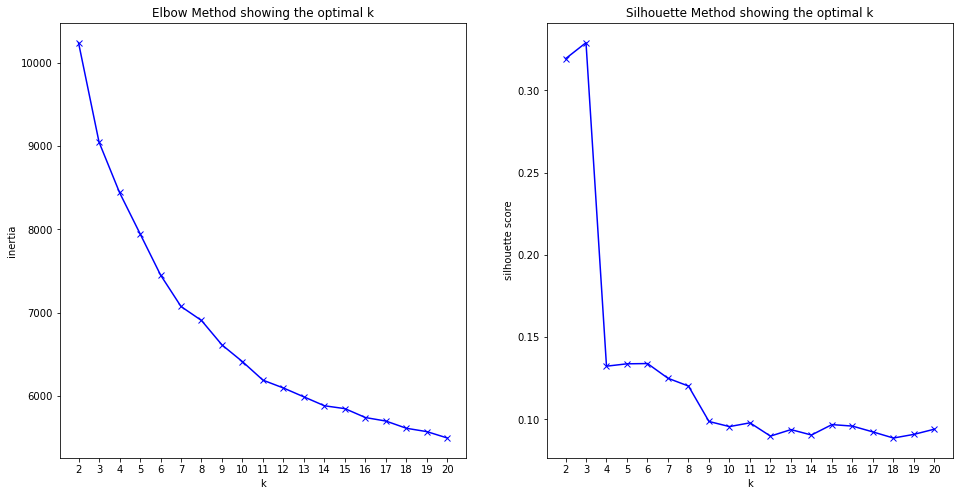

In [25]:
K = range(2, 21)
inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1) #displays a progress message
    kmeans.fit(df1)
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df1, kmeans.predict(df1)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [26]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!")

In [30]:
best_model = load("kmeans_10.pickle")

In [34]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(df1)

KMeans(n_clusters=10, random_state=1234)

In [35]:
clusters = kmeans.predict(df1)
#clusters
pd.Series(clusters).value_counts().sort_index() 

0    294
1    704
2     83
3    358
4     48
5    258
6    373
7      1
8    207
9    139
dtype: int64

In [36]:
df1["cluster"] = clusters
df1.head()

,brand_111skin,brand_aesop,brand_algenist,brand_allies of skin,brand_alpha-h,brand_ameliorate,brand_anastasia beverly hills,brand_angela caglia,brand_anthony,brand_apothem labs,...,oily_skin,dry_skin,day_cream,night,wrinkles,acne,spf,eye_cream,cruelty_free,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,9
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [37]:
df['clusters']=df1["cluster"]
df.head()

,names,price,stars,moisturiser,toner,mask,cleanser,exfoliator,oil,serums,...,dry_skin,day_cream,night,wrinkles,acne,spf,eye_cream,cruelty_free,brand,clusters
0,Paula's Choice Skin Perfecting 2% BHA Liquid E...,36.0,4.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,paula's choice,8
1,Sunday Riley C.E.O. Afterglow Brightening Vita...,67.8,3.33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,sunday riley,9
2,Dieux Skin Forever Eye Masks - Dieux Classic,24.0,4.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dieux skin,3
3,Revitalash Advanced Eyelash Conditioner 3.5,126.5,4.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,revitalash,1
4,Then I Met You Living Cleansing Balm,41.8,4.44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,then i met you,5


In [40]:
df.to_csv('recommender_data.csv')

In [41]:
df_rec = pd.read_csv('recommender_data.csv')

In [42]:
df_rec.tail()

,Unnamed: 0,names,price,stars,moisturiser,toner,mask,cleanser,exfoliator,oil,...,dry_skin,day_cream,night,wrinkles,acne,spf,eye_cream,cruelty_free,brand,clusters
2460,2460,VERSO Super Facial Oil 1.01 fl.,113.00,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,verso,3
2461,2461,Alpha-H Hyaluronic 8 Serum,42.90,4.280229,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alpha-h,0
2462,2462,Sarah Chapman Morning Facial,25.90,4.280229,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sarah chapman,0
2463,2463,Medik8 Night Ritual Vitamin A,53.11,4.280229,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medik8,1
2464,2464,Elemis Clarifying Serum,62.10,4.280229,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,elemis,0


Now I will create the functions to use in the recommender: 
First, a function to be bale to filter the recommendation by vegan, cruelty free and gkuten free.
A function to load the data frame into the streamlit code that will be used for the app
Finally, a function to give you a name based on the imput and the cluster that input is in. If the input value is not found it will recommend at random


In [6]:
def filter_df(df, vegan, gluten_free, cruelty_free):
    df2 = df.copy()
    df2 = df2[df2.vegan == vegan]
    df2 = df2[df2.gluten_free == gluten_free]
    df2 = df2[df2.cruelty_free == cruelty_free]
    return df2

In [9]:
df_filtered = filtro_df(df_rec,1,0,0)

In [10]:
df_filtered.names

32                 Elemis Pro-Collagen Marine Cream SPF30
40          The Ordinary Glycolic Acid 7% Toning Solution
41      The Ordinary Hyaluronic Acid 2% + B5 Hydration...
47         The Ordinary AHA 30% + BHA 2% Peeling Solution
49               The Ordinary Caffeine Solution 5% + EGCG
                              ...                        
2245    Kopari Beauty Tropical Glow Gel Cleanser with ...
2257             Herbivore Pink Clay Gentle Soap Bar 113g
2266       St.Tropez Gradual Tan Body Lotion Light/Medium
2272    Volition Beauty Detoxifying Silt Gelée Mask wi...
2283        Dermalogica Clear Start Breakout Clearing Kit
Name: names, Length: 226, dtype: object

In [206]:
def load_csv(file):
    df = pd.read_csv(file)
    return df

In [207]:
load_csv('recommender_data.csv')

,names,clusters,cruelty_free,vegan,gluten_free
0,Paula's Choice Skin Perfecting 2% BHA Liquid E...,8,0.0,0.0,0.0
1,Sunday Riley C.E.O. Afterglow Brightening Vita...,8,1.0,0.0,0.0
2,Dieux Skin Forever Eye Masks - Dieux Classic,8,0.0,0.0,0.0
3,Revitalash Advanced Eyelash Conditioner 3.5,8,0.0,0.0,0.0
4,Then I Met You Living Cleansing Balm,8,0.0,0.0,0.0
...,...,...,...,...,...
2460,VERSO Super Facial Oil 1.01 fl.,6,0.0,0.0,0.0
2461,Alpha-H Hyaluronic 8 Serum,6,0.0,0.0,0.0
2462,Sarah Chapman Morning Facial,6,0.0,0.0,0.0
2463,Medik8 Night Ritual Vitamin A,6,0.0,0.0,0.0


In [16]:
def get_rec(name): 
    if name in list(df_filtered['names']):
        cluster = df_filtered[df_filtered.names == name].clusters
        sample = df_filtered[df_filtered.clusters == cluster.values[0]].sample()

    else:
        print("We don't recognise this product, but here is another one that we are sure you will love:")
        sample = df_filtered.sample()

    return display(sample)

In [17]:
get_rec(name = input("Product name: "))

Product name: kjhlkjhkj
We don't recognise this product, but here is another one that we are sure you will love:


,names,clusters,cruelty_free,vegan,gluten_free
707,Aesop Parsley Seed Anti-Oxidant Facial Hydrati...,0,0.0,1.0,0.0
